# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Описание датасета

Переменные, которые содержит датасет:
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


# Рекомендации по выполнению проекта
Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

Посмотрите на распределение признака для числовых переменных, устраните выбросы.

Оцените количество уникальных значений для номинативных переменных.

По необходимости преобразуйте данные

Проведите корреляционный анализ количественных переменных

Отберите не коррелирующие переменные.

Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

# Осмотр данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
pd.set_option('display.max_rows', 100)  # выведем больше строк
stud = pd.read_csv('stud_math.csv')

In [2]:
stud.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
299,GP,M,18,U,LE3,T,4.0,4.0,teacher,teacher,...,-3.0,yes,yes,yes,1.0,4.0,2.0,1.0,5.0,80.0
186,GP,M,16,U,GT3,NaN,1.0,2.0,services,services,...,-3.0,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,...,-6.0,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
302,GP,F,17,U,GT3,T,4.0,2.0,other,other,...,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,0.0,70.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,...,-6.0,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
251,GP,M,16,U,GT3,T,3.0,3.0,at_home,other,...,-6.0,yes,NaN,no,5.0,3.0,3.0,2.0,6.0,50.0
330,GP,M,18,U,LE3,T,2.0,2.0,other,other,...,-12.0,yes,yes,NaN,4.0,5.0,5.0,NaN,2.0,40.0
352,MS,M,18,U,LE3,T,1.0,3.0,at_home,services,...,-3.0,no,yes,yes,4.0,3.0,3.0,3.0,NaN,40.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

На первый взгляд, в датасете 13 числовых столбцов:

 - age 395 non-null int64
 - Medu 392 non-null float64
 - Fedu 371 non-null float64
 - traveltime 367 non-null float64
 - studytime 388 non-null float64
 - failures 373 non-null float64
 - studytime, granular 388 non-null float64
 - famrel 368 non-null float64
 - freetime 384 non-null float64
 - goout 387 non-null float64
 - health 380 non-null float64
 - absences 383 non-null float64
 - score 389 non-null float64
 
Эти столбцы числовые, но по факту только 2 из них реально числовые признаки: age и absences. score - целевая переменная. 

In [4]:
# вот так виднее сколько пропусков для каждого признака
stud.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

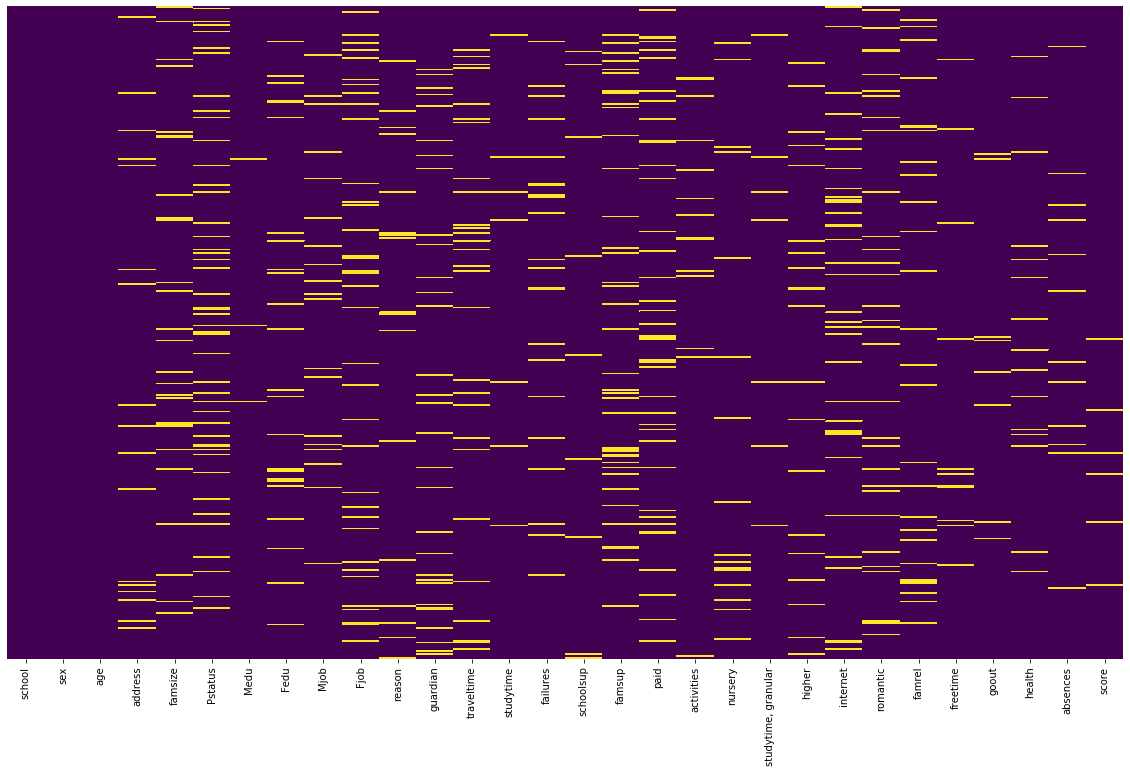

In [5]:
# а вот так еще виднее где пропуски
fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(
    stud.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Видно, что только 3 первых признака school, sex, age без пропусков, все остальные - с пропусками. 

Взглянем, есть ли очевилные различия между 10% студентов без оценки оли с самой низкой оценкой от 10% студентов с самыми высокими оценками:

## Это - двоечники - нижние 10% score

In [6]:
stud.sort_values('score', ascending=True, na_position='first').head(40)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,...,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,...,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,...,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,...,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,...,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN
296,GP,F,19,U,GT3,T,4.0,4.0,health,other,...,-6.0,yes,yes,no,2.0,3.0,4.0,2.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,...,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
333,GP,F,18,U,LE3,NaN,2.0,2.0,other,other,...,-6.0,yes,NaN,yes,4.0,3.0,3.0,2.0,0.0,0.0


## Это - отличники ( верхние 10% score)

In [7]:
stud.sort_values('score', ascending=False, na_position='last').head(40)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,...,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
374,MS,F,18,R,LE3,T,4.0,NaN,other,NaN,...,-9.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,95.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
113,GP,M,15,U,LE3,T,4.0,2.0,teacher,other,...,-3.0,yes,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,...,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
286,GP,F,18,U,GT3,T,2.0,NaN,at_home,at_home,...,-9.0,yes,yes,no,4.0,3.0,3.0,2.0,5.0,95.0
245,GP,M,16,U,GT3,NaN,2.0,1.0,other,other,...,-3.0,yes,yes,no,4.0,3.0,3.0,4.0,6.0,90.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,...,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,...,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,...,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0


 Итак, датасет состоит из данных о 395 учениках, в датасете 30 колонок, 13 из которых числовые ( из них истинно числовые - 2, остальные признаки - категориальные, закодированные в числа ) и 17 - строковые. Во всех столбцах, кроме school, sex, age присутствуют пустые значения, однако их не больше 50. Нужно будет проверить, можно ли заполнить пропуски, есть ли выбросы. Потом надо оценить взаимозависимость каждого признака с результатом (score) и выбрать признаки для модели. 
 
 На первый взгляд, отличники мало отличаются от двоечников. Проанализируем каждый признак.

# Первичный анализ данных в столбцах

## school — аббревиатура школы, в которой учится ученик

In [8]:
stud.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

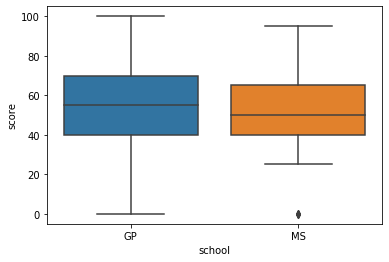

In [9]:
sns.boxplot(y='score', x='school', data=stud)

Школы делятся на категории 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira
Признак категориальный, пропусков нет.

## sex — пол ученика ('F' - женский, 'M' - мужской)

In [10]:
stud.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

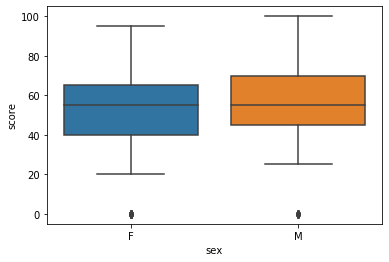

In [11]:
sns.boxplot(y='score', x='sex', data=stud)

Мальчиков и девочек в выборке примерно поровну. Признак категориальный, пропусков и ошибок нет.

## age — возраст ученика (от 15 до 22)

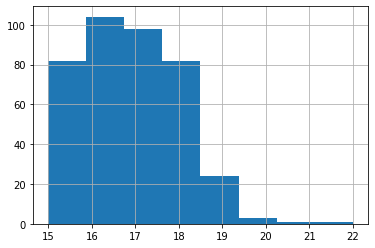

In [12]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:
stud.age.hist(bins=8)

In [13]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

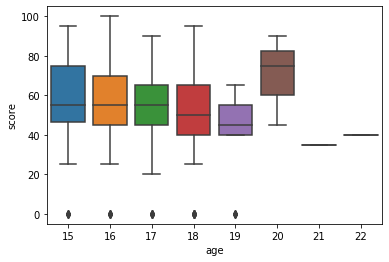

In [14]:
sns.boxplot(y='score', x='age', data=stud)

Попробуем отфильтровать выбросы и воспользуемся формулой интерквартильного расстояния. Выбросом считаются такие значения, которые лежат вне рамок [Q1 -1.5IQR : Q3+1.5IQR], где IQR = percentile(75) - percentile(25). Сначала посмотрим на боксплот:

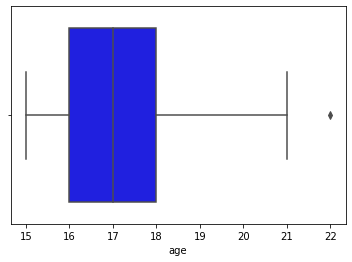

In [15]:
# видно, что, похоже, выбросы есть.
sns.boxplot(stud.age, color='blue')

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки. Посмотрим, сколько выбросов он найдет:

In [16]:
def outliers_iqr(ys):
    # находим квартили
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    # находим межквартильное расстояние
    iqr = quartile_3 - quartile_1
    # нижняя граница коробки
    lower_bound = quartile_1 - (iqr * 1.5)
    # верхняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)
    # возращаем только те значения и их индексы, ктр больше upper_bound и меньше lower_bound
    return ys[((ys > upper_bound) | (ys < lower_bound))]

In [17]:
# применяем функцию к признаку age из stud
out = outliers_iqr(stud.age)

In [18]:
out

247    22
Name: age, dtype: int64

In [19]:
stud.loc[247, 'age']

22

In [20]:
# мы подтвердили первоначальный вывод о том, что есть выброс, надо этот выброс удалить, фильтруем значения
stud.drop([247], inplace=True)

In [21]:
# проверяем
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
21      1
Name: age, dtype: int64

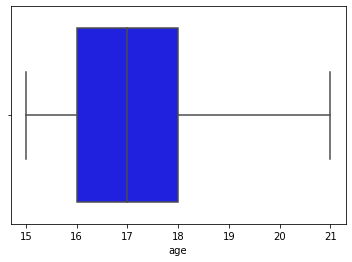

In [22]:
# теперь выбросов нет:
sns.boxplot(stud.age, color='blue')

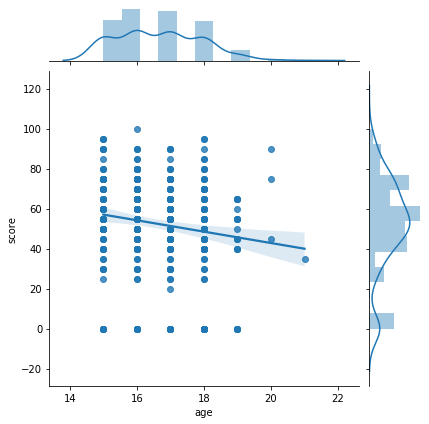

In [23]:
# исследуем зависимость результата от признака age:
sns.jointplot(x='age', y='score', data=stud, kind='reg')

__Вывод:__ в колонке age не было пропусков, но был 1 выброс - 22 года, мы нашли этот выброс с помощью boxplot и формулы интерквартильного расстояния, строку с выбросом удалили. Примерно по одной четверти учащихся в возрасте 16 и 17 лет соответственно, примерно по одной пятой - в возрасте 18 и 15 лет. Учащиеся с возрастом 20 лет и 21 год составляют менее одного процента совокупно. Из регрессии на графике видно, что есть обратная зависимость между возратом и результатом экзамена.

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [24]:
# выясним, есть ли пропуски:
stud.address.value_counts(dropna=False, normalize=True)

U      0.746193
R      0.210660
NaN    0.043147
Name: address, dtype: float64

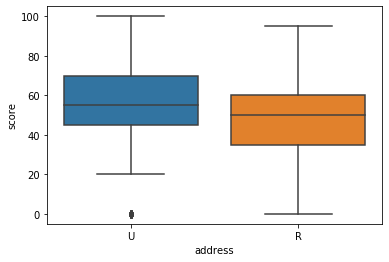

In [25]:
sns.boxplot(y='score', x='address', data=stud)

Признак категориальный, 2 уникальных значения, ошибок нет, 4% пропусков. Заполняю пропуски самым частым значением. Сельские студенты сдают тест похуже.

In [26]:
# сделаем замену пустых значений типа адреса на самое часто встречающееся значение - U
stud['address'].fillna('U', inplace=True)

In [27]:
# проверяем
stud.address.unique()

array(['U', 'R'], dtype=object)

В признаке address не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - U, преобладающее количество студентов (примерно 75%) живет в городе.



## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [28]:
stud.famsize.value_counts(dropna=False, normalize=True)

GT3    0.659898
LE3    0.271574
NaN    0.068528
Name: famsize, dtype: float64

In [29]:
stud.famsize.mode()[0]

'GT3'

Признак категориальный, ошибок нет, 7% пропусков. Заполняю пропуски модой GT3.

In [30]:
stud.famsize.fillna(stud.famsize.mode()[0], inplace=True)
stud.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

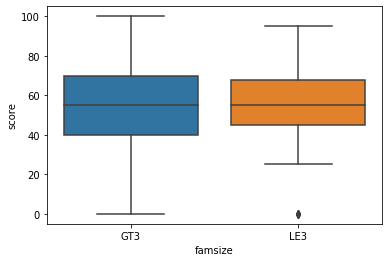

In [31]:
sns.boxplot(y='score', x='famsize', data=stud)

## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [32]:
stud.Pstatus.value_counts(dropna=False)

T      313
NaN     45
A       36
Name: Pstatus, dtype: int64

Признак категориальный, 45 пропусков. Заполняю пропуски значением 'N', так как число их велико, больше 10%.

In [33]:
stud.Pstatus.fillna('N', inplace=True)

In [34]:
stud.Pstatus.unique()

array(['A', 'N', 'T'], dtype=object)

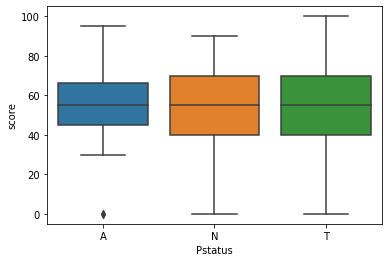

In [35]:
sns.boxplot(y='score', x='Pstatus', data=stud)

## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [36]:
stud.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

In [37]:
stud.Medu.fillna(4.0, inplace=True)

In [38]:
# проверяю
stud.Medu.unique()

array([4., 1., 3., 2., 0.])

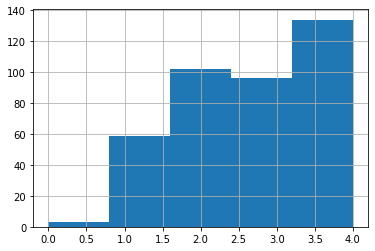

In [39]:
stud.Medu.hist(bins=5)

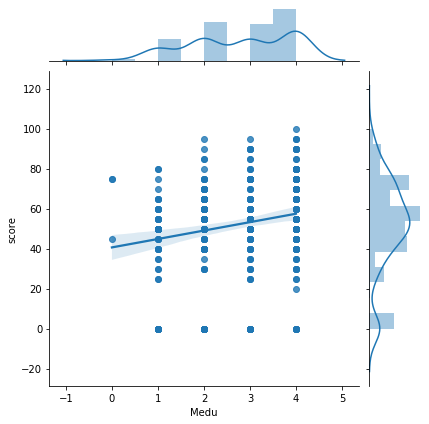

In [40]:
sns.jointplot(y='score', x='Medu', data=stud, kind='reg')

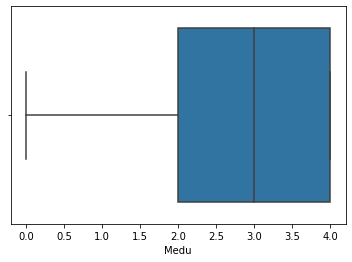

In [41]:
# также проверяю, есть ли выбросы в признаке
sns.boxplot(stud.Medu)

__Вывод:__ Признак ординальный, ошибок нет, 3 пропуска. Заполняю пропуски самым частым значением 4.Дети высокообразованных женщин сдают тест с максимальным разбросом оценок.

## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [42]:
stud.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      77
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

Считаю выброс - 40.0 - следствием опечатки, заменяю на 4.0

In [43]:
stud.loc[stud.Fedu == 40.0, 'Fedu'] = 4.0

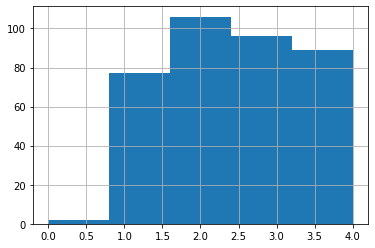

In [44]:
stud.Fedu.hist(bins=5)

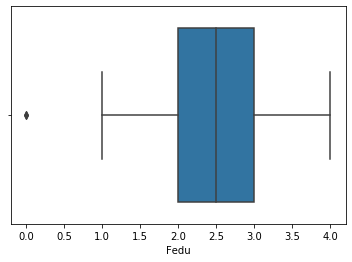

In [45]:
# остались ли выбросы сейчас?
sns.boxplot(stud.Fedu)

Выбросы - данные о 2 детях, у которых отцы без образования. Решил не удалять их.

Пропуски. Видим что из 395 нет информации о 24 строках. 5% процентов пропусков всего. Заменим на самое часто встречающееся значение - 2

In [46]:
stud.Fedu.fillna(stud.Fedu.mode()[0], inplace=True)
stud.Fedu.unique()

array([4., 1., 2., 3., 0.])

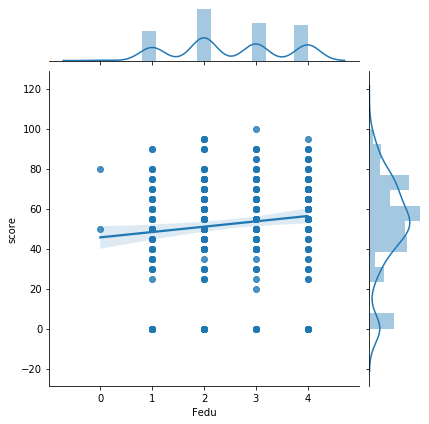

In [47]:
sns.jointplot(y='score', x='Fedu', data=stud, kind='reg')

__Вывод:__ Признак ординальный. В колонке Fedu был 1 выброс и были пропуски, которые мы заменили самым часто встречающимся значением.

## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [48]:
stud.Mjob.value_counts(dropna=False)

other       133
services     97
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

Mjob — уникальных значений 5, других значений нет, значит в данных нет опечаток, но есть пропуски, их меньше 10%, заменим их модой.

In [49]:
stud.Mjob.fillna(stud.Mjob.mode()[0], inplace=True)
stud.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

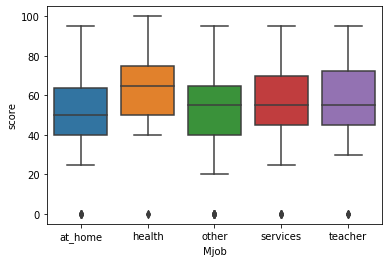

In [50]:
sns.boxplot(y='score', x='Mjob', data=stud)

__Вывод:__ в колонке Mjob не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у больше чем 33% студентов работа матери относится к категории "другая".

## Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [51]:
stud.Fjob.value_counts(dropna=False)

other       197
services    101
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Ошибок нет, пропусков менее 10%, заменяем их на моду.

In [52]:
stud.Fjob.fillna(stud.Fjob.mode()[0], inplace=True)
stud.Fjob.unique()

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

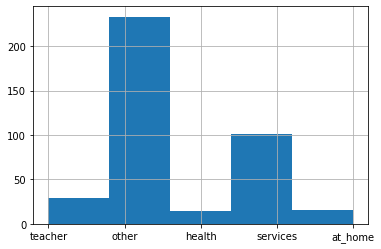

In [53]:
stud.Fjob.hist(bins=5)

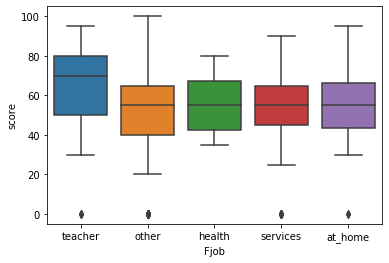

In [54]:
sns.boxplot(y='score', x='Fjob', data=stud)

__Вывод:__ в колонке Fjob не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у почти 50% студентов работа отца какая-то другая.

## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [55]:
stud.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          33
NaN            17
Name: reason, dtype: int64

Признак категориальный, ошибок нет, пропусков менее 5%. Заполняем модой - 'course'

In [56]:
stud.reason.fillna(stud.reason.mode()[0], inplace=True)
stud.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

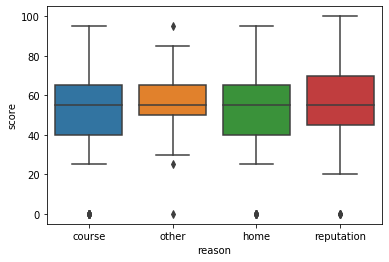

In [57]:
sns.boxplot(y='score', x='reason', data=stud)

__Вывод:__ было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - course, примерно 36% студентов выбрали школу из-за образовательной программы, но это не привело к лучшим результатам в тесте.

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [58]:
stud.guardian.value_counts(dropna=False)

mother    249
father     86
NaN        31
other      28
Name: guardian, dtype: int64

guardian — уникальных значений 3, других значений нет, в данных нет опечаток, но есть пропуски - менее 10%.

In [59]:
stud.guardian.fillna(stud.guardian.mode()[0], inplace=True)
stud.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

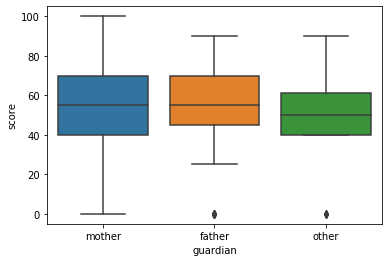

In [60]:
sns.boxplot(y='score', x='guardian', data=stud)

__Вывод:__ колонке guardian не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - mother, у почти 69% студентов опекуном является мать. Если опекун - не отец или мать, оценка студента в среднем похуже.

## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [61]:
stud.traveltime.value_counts(dropna=False)

1.0    241
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

 traveltime — уникальных значений 4, других значений нет, значит в данных нет опечаток, но есть пропуски - менее 10%

In [62]:
stud.traveltime.fillna(stud.traveltime.mode()[0], inplace=True)
stud.traveltime.unique()

array([2., 1., 3., 4.])

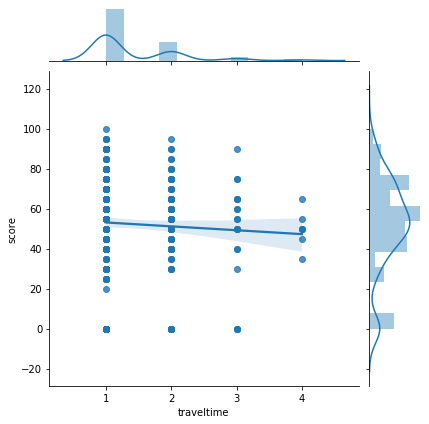

In [63]:
sns.jointplot(y='score', x='traveltime', data=stud, kind='reg')

__Вывод:__ traveltime - признак ординальный, 28 пропусков.Заменил на самую частую категорию - 1 <15 мин, почти 66% студентов живут в 15 минутах от школы

## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [64]:
stud.studytime.value_counts(dropna=False)

2.0    194
1.0    102
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

studytime — ошибок заполнения нет, пропусков - 7. Заменяю на моду.

In [65]:
stud.studytime.fillna(stud.studytime.mode()[0], inplace=True)
stud.studytime.unique()

array([2., 3., 1., 4.])

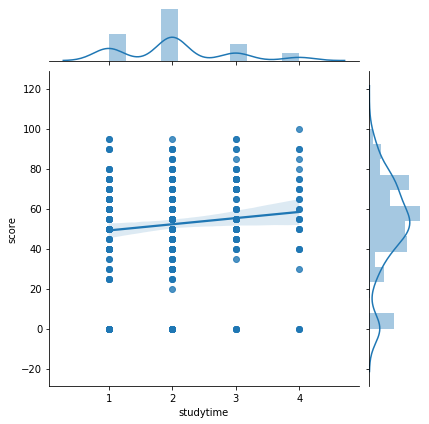

In [66]:
sns.jointplot(y='score', x='studytime', data=stud, kind='reg')

__Вывод:__ признак ординальный, 7 пропусков.Заменил на моду - 2. 50% студентов тратят на учебу от 2 до 5 часов.

## failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

In [67]:
stud.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     14
Name: failures, dtype: int64

In [68]:
stud.failures.fillna(stud.failures.mode()[0], inplace=True)
stud.failures.unique()

array([0., 3., 2., 1.])

__Вывод:__ Признак ординальный, 22 пропускa. Заголовок пункта должен звучать так "n, если 0<=n<=3, иначе 4" Мой младший сын учился в старшей школе в Штатах, там студенты с 4 и более failures не доживали до теста - их выгоняли раньше. Попробовал пропуски заменить на 4. Окончательно решил заменять на 0. Похоже, признак коррелирует с результатом теста.

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


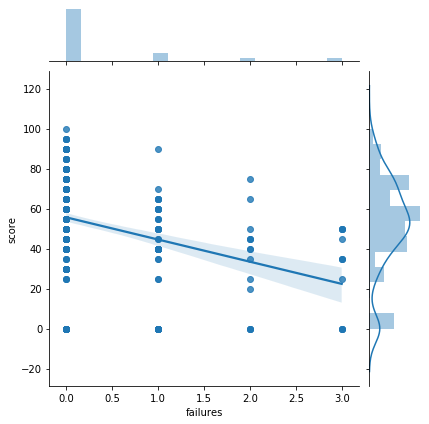

In [69]:
# Видна зависимость оценки теста от количества замечаний.
sns.jointplot(y='score', x='failures', data=stud, kind='reg')

## schoolsup — дополнительная образовательная поддержка (yes или no)

In [70]:
stud.schoolsup.value_counts(dropna=False)

no     334
yes     51
NaN      9
Name: schoolsup, dtype: int64

schoolsup — уникальных значений 2, других значений нет, значит в данных нет опечаток, но есть пропуски - 9.

In [71]:
stud.schoolsup.fillna(stud.schoolsup.mode()[0], inplace=True)
stud.schoolsup.unique()

array(['yes', 'no'], dtype=object)

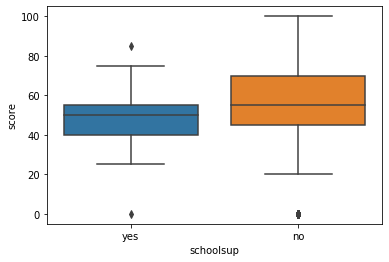

In [72]:
sns.boxplot(y='score', x='schoolsup', data=stud)

__Вывод:__ Признак категориальный, 9 пропусков. Похоже, дополнительой поддержкой пользовались плохо успевающие студенты, но она помогала им лишь отчасти. Заменил пропуски на моду.

## famsup — семейная образовательная поддержка (yes или no)

In [73]:
stud.famsup.value_counts(dropna=False)

yes    219
no     136
NaN     39
Name: famsup, dtype: int64

Признак категориальный, ошибок ввода нет, пропусков чуть менее 10%. Заменил пропуски на моду.

In [74]:
stud.famsup.fillna(stud.famsup.mode()[0], inplace=True)
stud.famsup.unique()

array(['no', 'yes'], dtype=object)

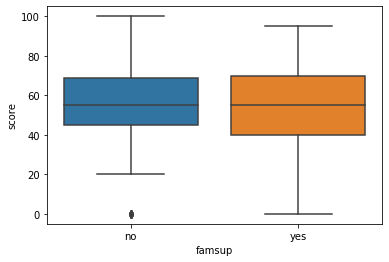

In [75]:
sns.boxplot(y='score', x='famsup', data=stud)

## paid — дополнительные платные занятия по математике (yes или no)

In [76]:
stud.paid.value_counts(dropna=False)

no     199
yes    155
NaN     40
Name: paid, dtype: int64

In [77]:
stud.paid.fillna('N', inplace=True)
stud.paid.unique()

array(['no', 'N', 'yes'], dtype=object)

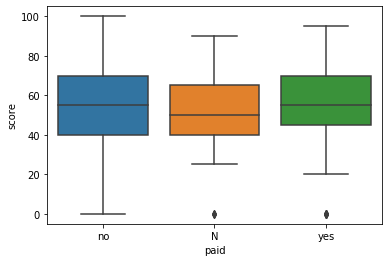

In [78]:
sns.boxplot(y='score', x='paid', data=stud)

__Вывод:__ Признак категориальный, 40 пропусков, ошибок ввода нет. Заменил пропуски на новое значение - N.

## activities — дополнительные внеучебные занятия (yes или no)

In [79]:
stud.activities.value_counts(dropna=False)

yes    195
no     185
NaN     14
Name: activities, dtype: int64

In [80]:
stud.activities.fillna(stud.activities.mode()[0], inplace=True)
stud.activities.unique()

array(['no', 'yes'], dtype=object)

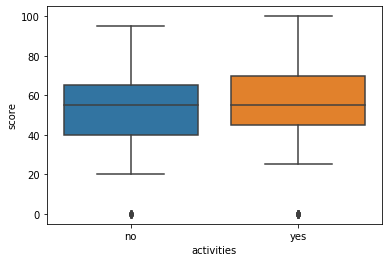

In [81]:
sns.boxplot(y='score', x='activities', data=stud)

__Вывод:__ Признак категориальный, 14 пропусков, ошибок ввода нет. Заменил пропуски на самое частое значение.

## nursery — посещал детский сад (yes или no)

In [82]:
stud.nursery.value_counts(dropna=False)

yes    300
no      78
NaN     16
Name: nursery, dtype: int64

In [83]:
stud.nursery.fillna(stud.nursery.mode()[0], inplace=True)
stud.nursery.unique()

array(['yes', 'no'], dtype=object)

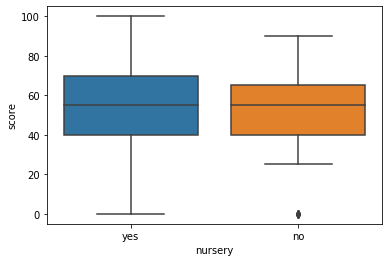

In [84]:
sns.boxplot(y='score', x='nursery', data=stud)

__Вывод:__ Признак категориальный, 16 пропусков. В колонке nursery не было ошибочных данных, пропуски мы заменили на самое часто встречающееся значение - yes, примено 80% учащихся посещали детский сад.

## studytime, granular - признак, не указанный в описании

In [85]:
# для удобства сначала переименуем его
stud.rename({'studytime, granular': 'st_gran'}, axis='columns', inplace=True)

In [86]:
stud.st_gran.value_counts(dropna=False)

-6.0     194
-3.0     102
-9.0      64
-12.0     27
 NaN       7
Name: st_gran, dtype: int64

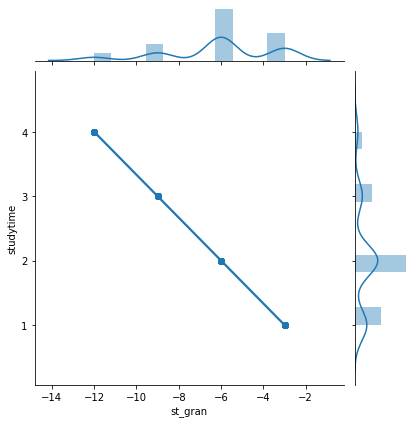

In [87]:
# признак коррелирует с признаком studytime
sns.jointplot(y='studytime', x='st_gran', data=stud, kind='reg')

In [88]:
stud[['studytime', 'st_gran']].corr()

,studytime,st_gran
studytime,1.0,-1.0
st_gran,-1.0,1.0


__Вывод:__ Признак категориальный, 7 пропусков. Полностью коррелирует с признаком studytime, поэтому для нас ценности не представляет. Удалим его сразу же.

In [89]:
stud.drop('st_gran', axis='columns', inplace=True)

## higher — хочет получить высшее образование (yes или no)

In [90]:
stud.higher.value_counts(dropna=False)

yes    356
NaN     20
no      18
Name: higher, dtype: int64

In [91]:
stud.higher.fillna(stud.higher.mode()[0], inplace=True)
stud.higher.unique()

array(['yes', 'no'], dtype=object)

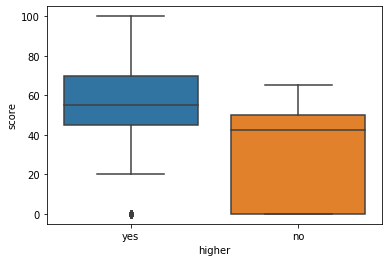

In [92]:
sns.boxplot(y='score', x='higher', data=stud)

__Вывод:__ Признак категориальный, 20 пропусков. Взаимосвязь с результатом сильная. Заменил пропуски на 'yes'.

## internet — наличие интернета дома (yes или no)

In [93]:
stud.internet.value_counts(dropna=False)

yes    304
no      56
NaN     34
Name: internet, dtype: int64

In [94]:
stud.internet.fillna(stud.internet.mode()[0], inplace=True)
stud.internet.unique()

array(['yes', 'no'], dtype=object)

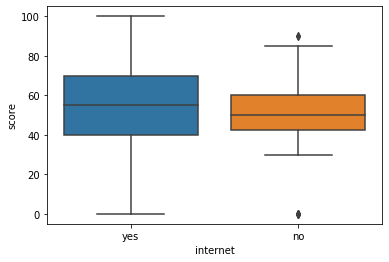

In [95]:
sns.boxplot(y='score', x='internet', data=stud)

__Вывод:__ Признак категориальный, 34 пропуска. Взаимосвязь с результатом незначительная. Заменил пропуски на 'yes'

## romantic — в романтических отношениях (yes или no)

In [96]:
stud.romantic.value_counts(dropna=False)

no     240
yes    123
NaN     31
Name: romantic, dtype: int64

In [97]:
stud.romantic.fillna(stud.romantic.mode()[0], inplace=True)
stud.romantic.unique()

array(['no', 'yes'], dtype=object)

In [98]:
stud.romantic = stud.romantic.astype(str).apply(
    lambda x: 'yes' if x.strip() == 'N' else x)

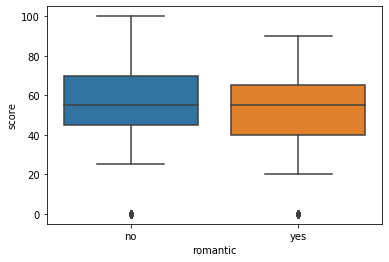

In [99]:
sns.boxplot(y='score', x='romantic', data=stud)

__Вывод:__ Признак категориальный, 31 пропуск ошибок ввода нет. Заменил на моду - 'no'.

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [100]:
stud.famrel.value_counts(dropna=False)

 4.0    182
 5.0     98
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

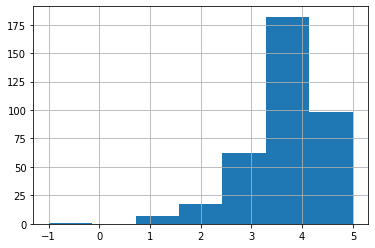

In [101]:
stud.famrel.hist(bins=7)

Вероятнее всего, единственное значение признака -1.0 - ошибка заполнения. Исправляю ее, заменив значение на 1.0.

In [102]:
stud.loc[stud.famrel == -1.0, 'famrel'] = 1.0

In [103]:
stud.famrel.fillna(stud.famrel.mode()[0], inplace=True)
stud.famrel.unique()

array([4., 5., 3., 1., 2.])

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


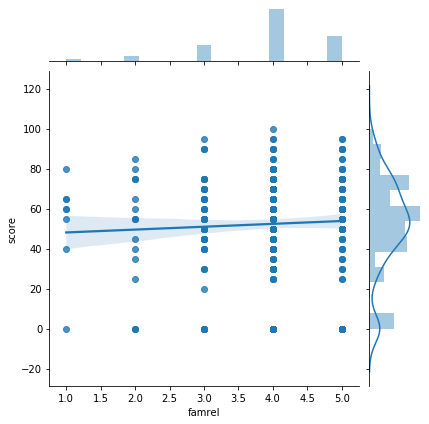

In [104]:
sns.jointplot(y='score', x='famrel', data=stud, kind='reg')

__Вывод:__ Признак ординальный, 27 пропусков, 1 явный выброс(вероятно, опечатка). Заменил выброс на 1, пропуски на самое частое значение 4.

## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [105]:
stud.freetime.value_counts(dropna=False)

3.0    153
4.0    111
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

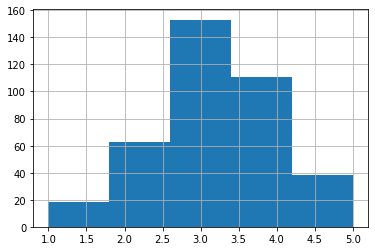

In [106]:
stud.freetime.hist(bins=5)

In [107]:
stud.freetime.fillna(stud.freetime.mode()[0], inplace=True)
stud.freetime.unique()

array([3., 2., 4., 1., 5.])

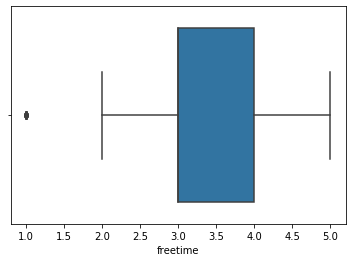

In [108]:
# присмотримся, есть ли выбросы
sns.boxplot(x='freetime', data=stud)

Отношения в семье на уровне 1.0 - очень плохие - похожи на выброс. Но решил записи с этим значением признака не удалять. Все равно, похоже, признак нам не пригодится для модели, так как визуально слабо коррелирует с результатом:

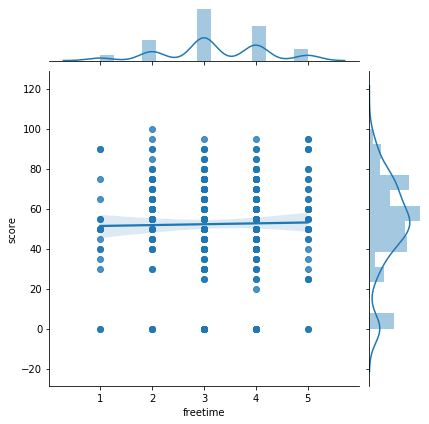

In [109]:
sns.jointplot(y='score', x='freetime', data=stud, kind='reg')

__Вывод:__ Признак ординальный, 11 пропусков, ошибок заполнения нет. Заменил пропуски на самое частое значение 3.0.

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [110]:
stud.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     51
1.0     23
NaN      8
Name: goout, dtype: int64

In [111]:
stud.goout.fillna(stud.goout.mode()[0], inplace=True)
stud.goout.value_counts()

3.0    135
2.0    101
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

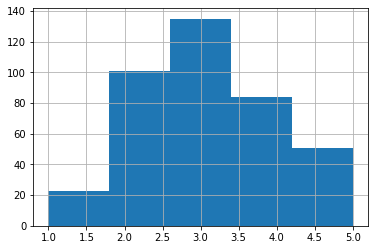

In [112]:
stud.goout.hist(bins=5)

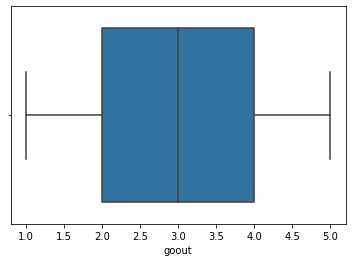

In [113]:
# присмотримся, есть ли выбросы
sns.boxplot(x='goout', data=stud)

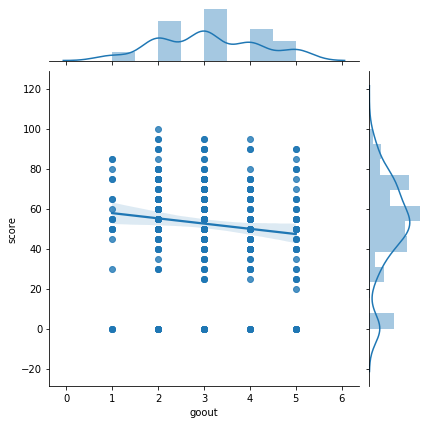

In [114]:
sns.jointplot(y='score', x='goout', data=stud, kind='reg')

__Вывод:__ Признак ординальный, 8 пропусков, ошибок ввода нет.  Заменил пропуски на моду.

## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [115]:
stud.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
NaN     15
Name: health, dtype: int64

In [116]:
stud.health.fillna(stud.health.mode()[0], inplace=True)
stud.health.value_counts()

5.0    153
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64

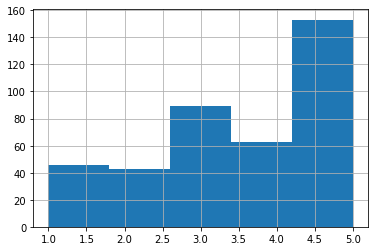

In [117]:
stud.health.hist(bins=5)

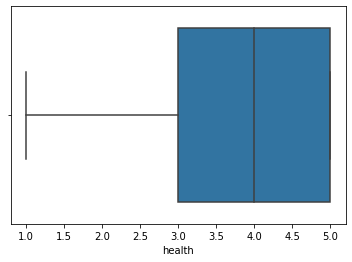

In [118]:
sns.boxplot(x='health', data=stud)

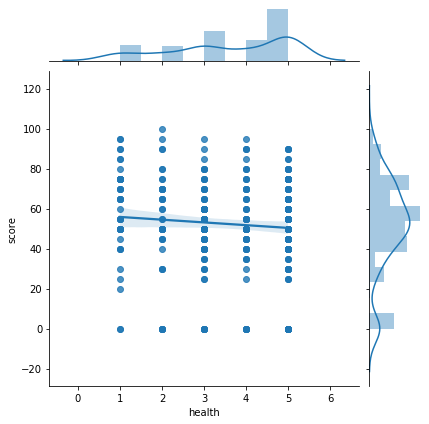

In [119]:
sns.jointplot(y='score', x='health', data=stud, kind='reg')

Признак ординальный, ошибок нет, 15 пропусков. В итоге заменил пропуски на самое частое значение. 

## absences — количество пропущенных занятий

In [120]:
# признак числовой, основная масса значений находится в интервале от 0 до 20 занятий, есть 12 пропусков
stud.absences.value_counts(dropna=False).head(10)

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
NaN      12
14.0     12
3.0       8
Name: absences, dtype: int64

In [121]:
# Заполним пропуски самым частым значением:
stud.absences.fillna(stud.absences.mode()[0], inplace=True)

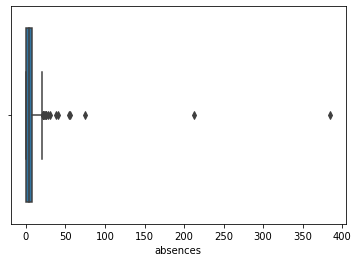

In [122]:
# проверим, где находятся выбросы
sns.boxplot(x='absences', data=stud)

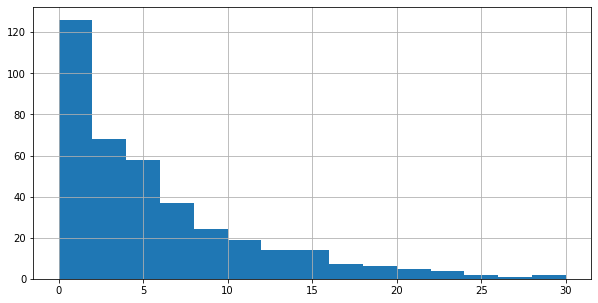

In [123]:
# несколько сот часов пропуска занятий - явные выбросы, похоже, в школьном курсе нет столько часов математики
# рассмотрим пропуски в разумных пркеделах(верхняя граница коробки на графике выше равна примерно 30)
stud[stud.absences <= 30].absences.hist(bins=15, figsize=(10, 5))

In [124]:
# найдем выбросы с помощью нашей функции outliers_iqr и удалим их:
out1 = outliers_iqr(stud.absences)

In [125]:
stud.loc[out1.index.tolist(), ['absences', 'score']]

,absences,score
40,25.0,55.0
74,54.0,55.0
103,26.0,30.0
183,56.0,40.0
198,24.0,90.0
205,28.0,45.0
216,22.0,20.0
222,385.0,85.0
260,21.0,90.0
276,75.0,45.0


In [126]:
# всего мы удалим 17 записей, будем надеяться, что модель,
# обученная на оставшемся датасете, будет работать точнее
stud.drop(out1.index.tolist(), inplace=True)

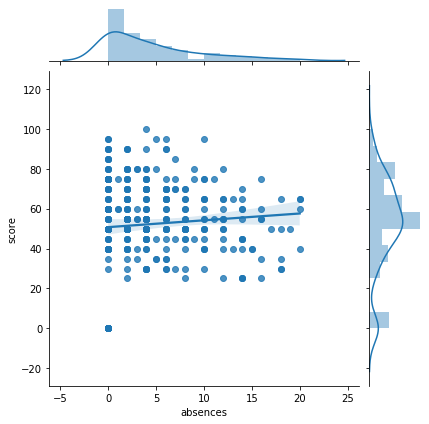

In [127]:
# взглянем на корреляцию с результатом
sns.jointplot(x='absences', y='score', data=stud, kind='reg')

__Вывод:__ Признак числовой, 12 пропусков. В этом признаке явно есть выбросы - единичные студенты пропустили очень много занятий. Избавились от этих выбросов. Пропуски заполнили модой = 0.0

## score — баллы по госэкзамену по математике

In [128]:
stud.score.value_counts(dropna=False)

50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
70.0     27
40.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
NaN       6
85.0      5
95.0      5
100.0     1
Name: score, dtype: int64

In [129]:
# имеем 6 пропусков, чтобы грамотно заполнить их, вычислим статистики:
stud.score.describe(), stud.score.mode()

(count    371.000000
 mean      52.264151
 std       23.094876
 min        0.000000
 25%       40.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: score, dtype: float64,
 0    50.0
 dtype: float64)

In [130]:
# видим, что значения статистик близки, заполняем пропуски модой
stud.score.fillna(stud.score.mode()[0], inplace=True)

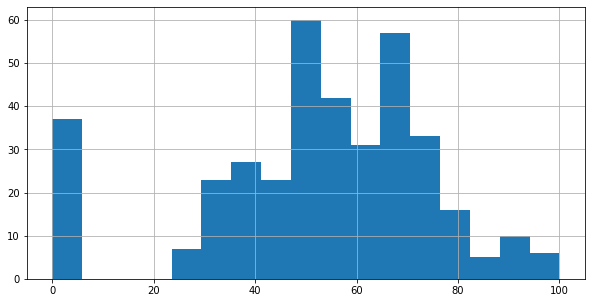

In [131]:
# гистограмма признака score
stud.score.hist(bins=17, figsize=(10, 5))

Посмотрим на статистику результата. Выясним, где находятся границы выбросов. Нулевой результат - это выброс или нет? По смыслу - должен быть выбросом (в школьном тесте по математике всегда есть пара задач, которая под силу любому человеку).

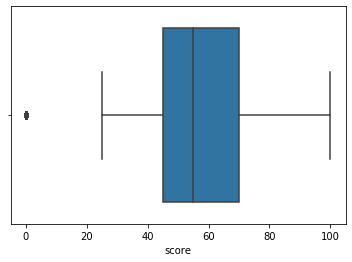

In [132]:
# сначала присмотримся к boxplot - он нам показывает, что ноль - это выброс
# волевым решением оставляем выброс в данных, иначе потеряем 37 записей.
sns.boxplot(x='score', data=stud)

__Вывод:__ целевая переменная score - числовая, в диапазоне от 0 до 100, со средними величинами между 50 и 55. Предположительно 0 - это выброс, остальные значения в диапазоне от 25 до 100, что соответствует обычным школьным оценкам.

# Корреляционный анализ

__В датасете присутствуют числовые, ординальные и номинативные признаки. Значения ординальных признаков закодированы цифрами, что позволяет судить об их корреляции с результатом.__

## Ординальные и числовые признаки ( и результат)

In [133]:
# тип данных этих признаков int64 или float64.
# мы уже строили диаграммы их взаимосвязи с результатом
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      377 non-null    object 
 1   sex         377 non-null    object 
 2   age         377 non-null    int64  
 3   address     377 non-null    object 
 4   famsize     377 non-null    object 
 5   Pstatus     377 non-null    object 
 6   Medu        377 non-null    float64
 7   Fedu        377 non-null    float64
 8   Mjob        377 non-null    object 
 9   Fjob        377 non-null    object 
 10  reason      377 non-null    object 
 11  guardian    377 non-null    object 
 12  traveltime  377 non-null    float64
 13  studytime   377 non-null    float64
 14  failures    377 non-null    float64
 15  schoolsup   377 non-null    object 
 16  famsup      377 non-null    object 
 17  paid        377 non-null    object 
 18  activities  377 non-null    object 
 19  nursery     377 non-null    o

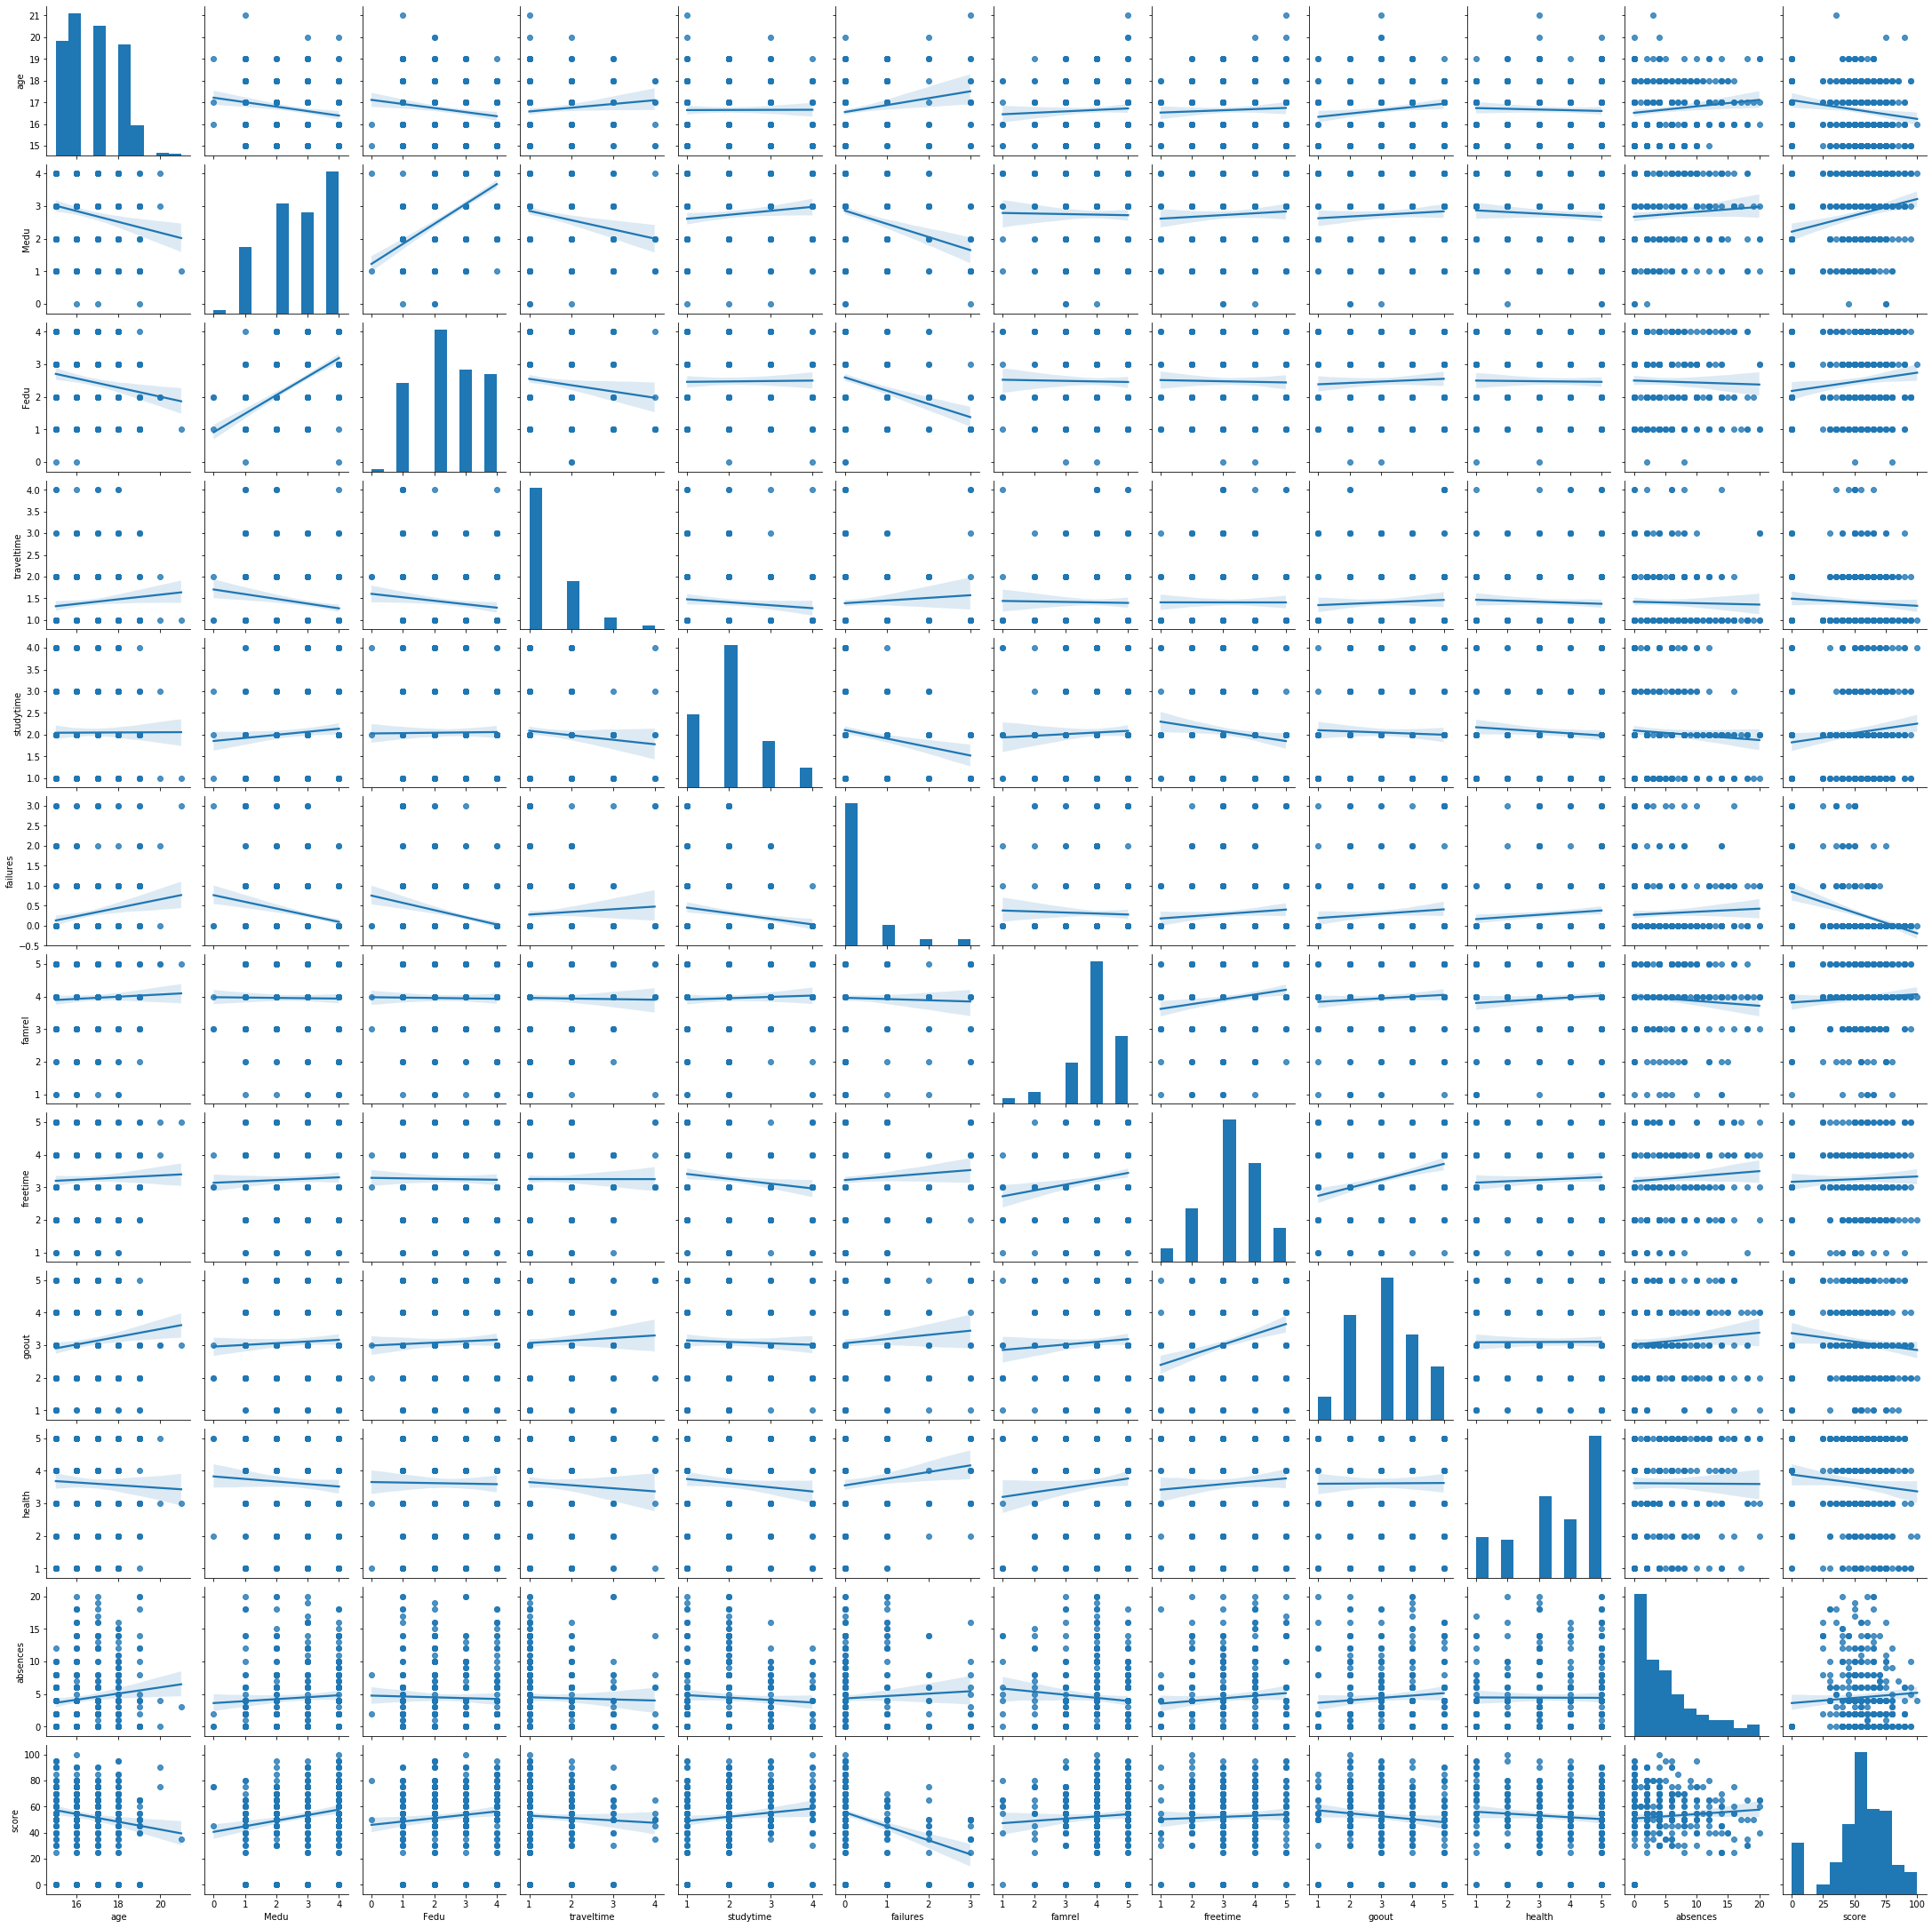

In [134]:
# повторим их
sns.pairplot(stud, kind='reg')

По графикам видна корреляция некоторых признаков с результатом. Выберем для построения модели наиболее коррелирующие (модуль коэффициента более 0.1). Это несложно сделать в несколько строчек.

In [135]:
# находим таблицу корреляций признаков ( по абсолютной величине!)
corrs = stud.corr().abs().unstack().sort_values(ascending=False)

In [136]:
# выбираем из них те, что коррелируют с коэффицентом более 0.1
corr_pairs = corrs[corrs.values > 0.1].reset_index()

In [137]:
# У нас получилось нечто такое:
corr_pairs.head()

,level_0,level_1,0
0,score,score,1.0
1,absences,absences,1.0
2,Medu,Medu,1.0
3,Fedu,Fedu,1.0
4,traveltime,traveltime,1.0


In [138]:
# Выбираем те пары, где одна из переменных - целевая, вторые признаки собираем в список
list1_formodel = corr_pairs[(corr_pairs.level_0 == 'score') & (
    corr_pairs.level_1 != 'score')].level_1.tolist()

In [139]:
list1_formodel

['failures', 'Medu', 'age', 'Fedu', 'studytime', 'goout']

__Вывод:__ Из ординальных и числовых признаков для модели выбираем ['failures', 'Medu', 'age', 'Fedu', 'studytime', 'goout']

## Анализ номинативных признаков

Найдем, какие колонки достоверно связаны с результатом. Протестируем гипотезы ( нулевая - не связан, альтернативная - связан). Признаки,для которых доказана связь, включим в датасет для модели.

In [140]:
def nominative_analysis(col):
    global list2_formodel

    # Проверка на строковый тип данных, которым закодированы номинативные признаки
    if stud.loc[:, col].dtypes == np.dtype('O'):

        # печать наименования признака и графика
        print('Столбец', col)
        print('Распределение баллов по значениям признака:')

        # построение боксплотов распределения целевой переменной от значения признака
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=col, y='score',
                    data=stud,
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()

        # разбиваем значения признаков на пары и тестируем зависимость целевой переменной
        pairs_all = list(combinations(stud.loc[:, col].dropna().unique(), 2))
        for pair in pairs_all:
            if ttest_ind(stud.loc[stud.loc[:, col] == pair[0], 'score'],
                         stud.loc[stud.loc[:, col] == pair[1], 'score']).pvalue \
                    <= 0.05/len(pairs_all):  # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', col)
                list2_formodel.append(col)
                break
        print('----------------------------------')
        print()

Столбец school
Распределение баллов по значениям признака:


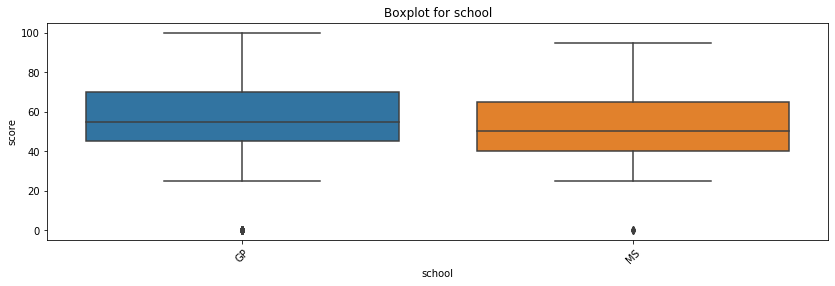

----------------------------------

Столбец sex
Распределение баллов по значениям признака:


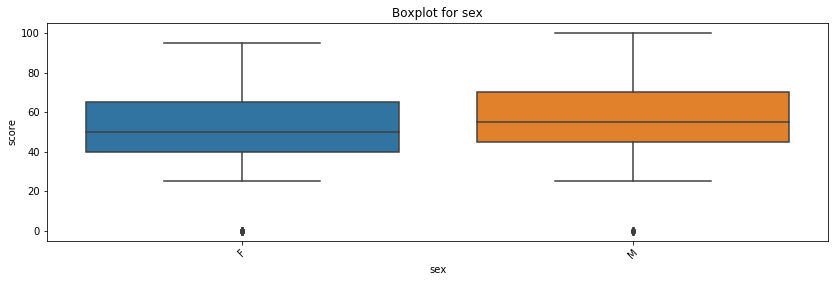

Найдены статистически значимые различия для колонки sex
----------------------------------

Столбец address
Распределение баллов по значениям признака:


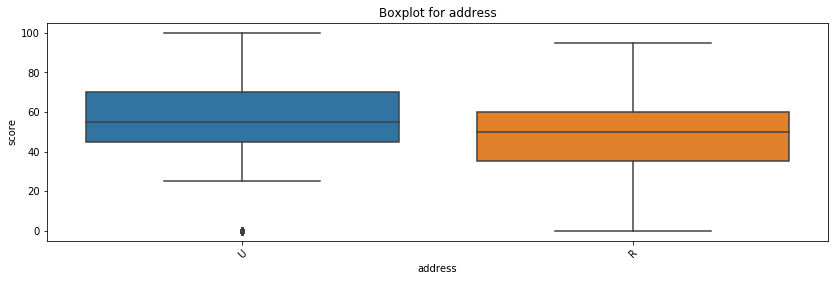

Найдены статистически значимые различия для колонки address
----------------------------------

Столбец famsize
Распределение баллов по значениям признака:


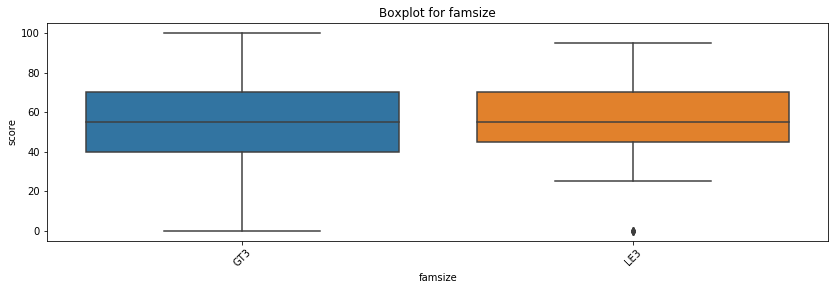

----------------------------------

Столбец Pstatus
Распределение баллов по значениям признака:


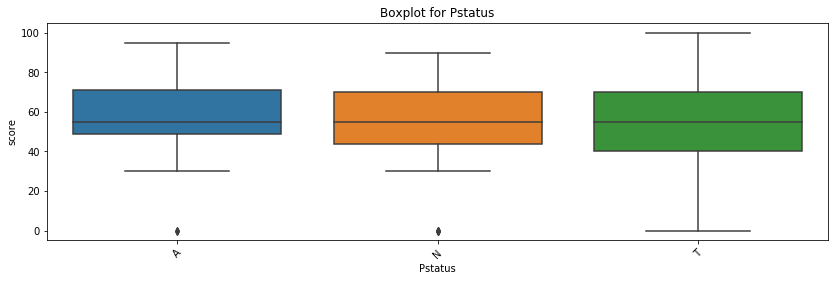

----------------------------------

Столбец Mjob
Распределение баллов по значениям признака:


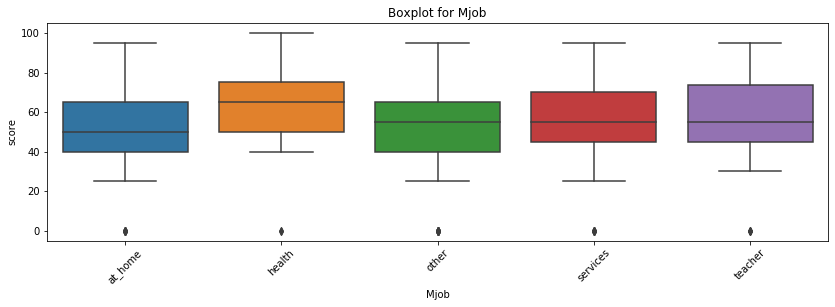

Найдены статистически значимые различия для колонки Mjob
----------------------------------

Столбец Fjob
Распределение баллов по значениям признака:


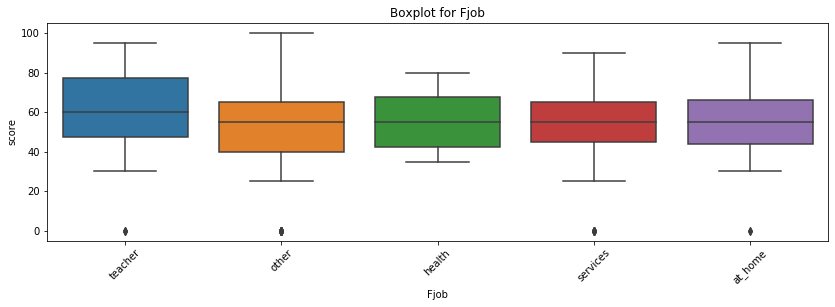

----------------------------------

Столбец reason
Распределение баллов по значениям признака:


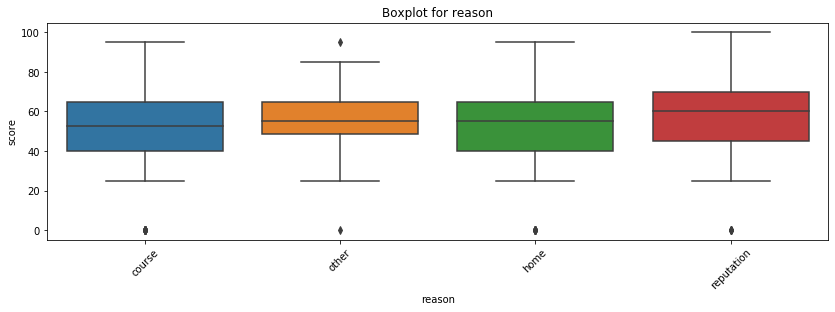

----------------------------------

Столбец guardian
Распределение баллов по значениям признака:


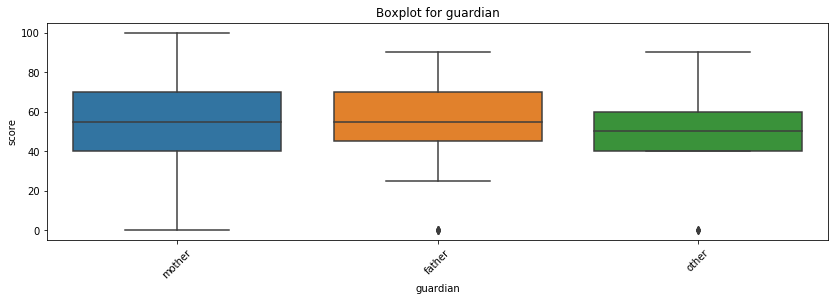

----------------------------------

Столбец schoolsup
Распределение баллов по значениям признака:


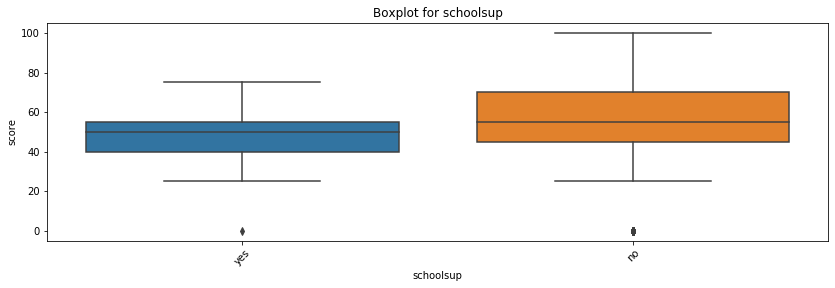

----------------------------------

Столбец famsup
Распределение баллов по значениям признака:


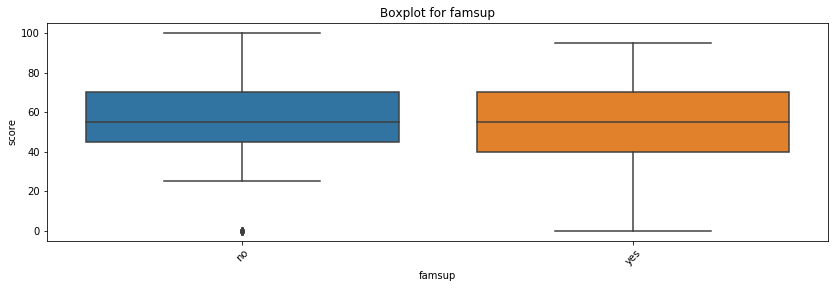

----------------------------------

Столбец paid
Распределение баллов по значениям признака:


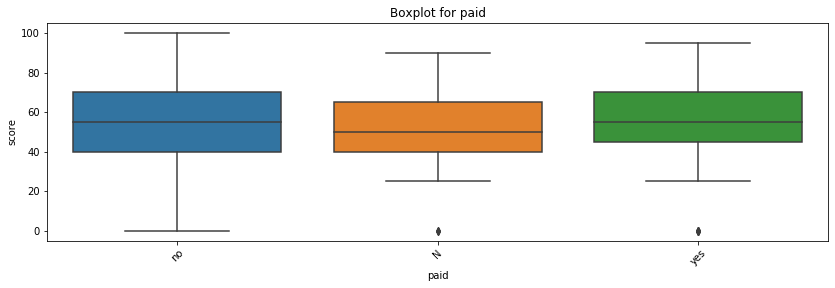

----------------------------------

Столбец activities
Распределение баллов по значениям признака:


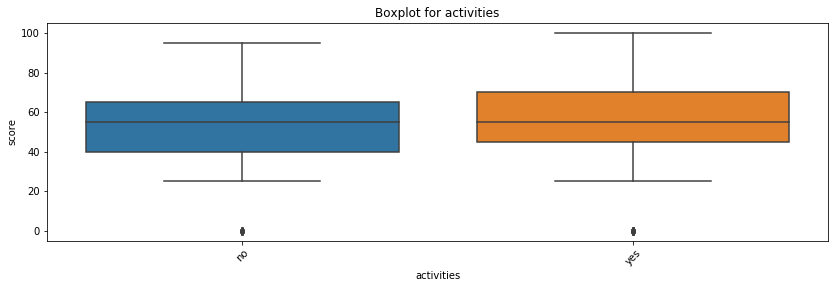

----------------------------------

Столбец nursery
Распределение баллов по значениям признака:


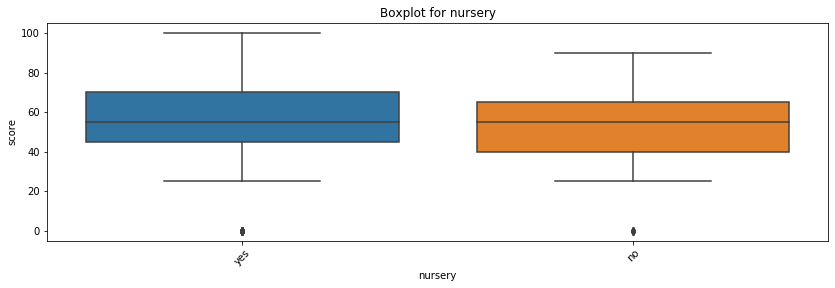

----------------------------------

Столбец higher
Распределение баллов по значениям признака:


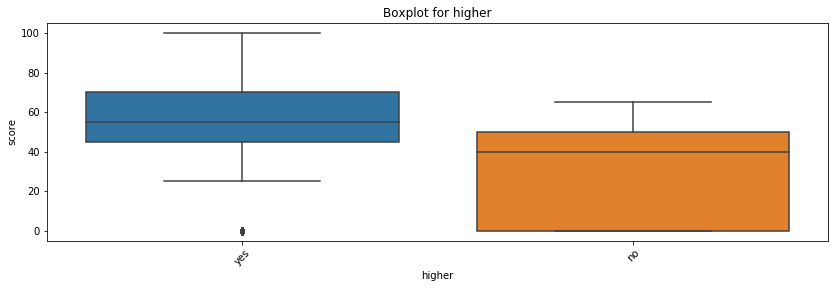

Найдены статистически значимые различия для колонки higher
----------------------------------

Столбец internet
Распределение баллов по значениям признака:


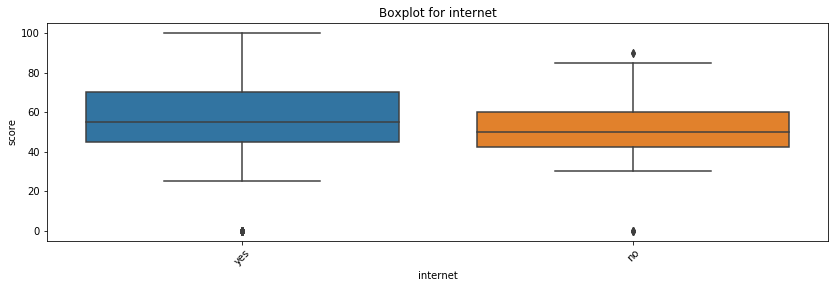

----------------------------------

Столбец romantic
Распределение баллов по значениям признака:


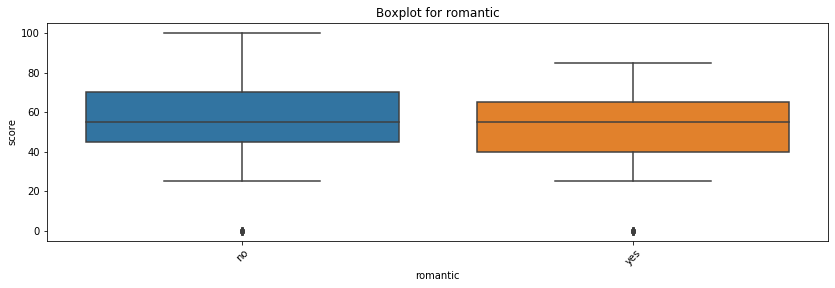

Найдены статистически значимые различия для колонки romantic
----------------------------------



In [141]:
list2_formodel = []
for col in stud.columns:
    nominative_analysis(col)

In [142]:
# А здесь мы собрали номинативные переменные, которые коррелируют с целевой
list2_formodel

['sex', 'address', 'Mjob', 'higher', 'romantic']

__Вывод:__ номинативные признаки, которые мы будем использовать в модели, это ['sex', 'address', 'Mjob', 'higher', 'romantic']

# Формирование датасета из значимых признаков для модели

In [143]:
# Суммируем списки ординальных, цифровых и номинативных признаков
list_formodel = list1_formodel + list2_formodel

In [144]:
# итого мы получили следующие значимые признаки:
list_formodel

['failures',
 'Medu',
 'age',
 'Fedu',
 'studytime',
 'goout',
 'sex',
 'address',
 'Mjob',
 'higher',
 'romantic']

In [145]:
stud_for_model = stud.loc[:, list_formodel]

In [146]:
# окончательно наш датасет для модели выглядит так:
stud_for_model.head()

,failures,Medu,age,Fedu,studytime,goout,sex,address,Mjob,higher,romantic
0,0.0,4.0,18,4.0,2.0,4.0,F,U,at_home,yes,no
1,0.0,1.0,17,1.0,2.0,3.0,F,U,at_home,yes,no
2,3.0,1.0,15,1.0,2.0,2.0,F,U,at_home,yes,no
3,0.0,4.0,15,2.0,3.0,2.0,F,U,health,yes,yes
4,0.0,3.0,16,3.0,2.0,2.0,F,U,other,yes,no


In [147]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   failures   377 non-null    float64
 1   Medu       377 non-null    float64
 2   age        377 non-null    int64  
 3   Fedu       377 non-null    float64
 4   studytime  377 non-null    float64
 5   goout      377 non-null    float64
 6   sex        377 non-null    object 
 7   address    377 non-null    object 
 8   Mjob       377 non-null    object 
 9   higher     377 non-null    object 
 10  romantic   377 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 45.3+ KB


# Выводы

__Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:__

 - В данных достаточно мало пустых значений, только в столбцах Pstatus, famsup, paid было примерно по 10% пропусков.
 - Выбросы найдены только в столбцах с возрастом, образованием отца, семейными отношениями и количеством пропущенных занятий, то есть в 4х признаках из 29, что позволяет сделать вывод о том, что данные достаточно чистые.
 - Выбросы, обусловленные некачественным сбором данных, найдены в столбцах Fedu, famrel. В столбце absences выбросы, похоже, обусловлены как некачественным сбором данных (значения больше 200), так и экстремальными количествами пропусков (например, 53).
 - Состояние здоровья, пропуски, время до школы, отношения в семье, а также количество свободного времени после школы практически не коррелируют с успешностью на ЕГЭ.
 - Работа матери влияет на успешность на ЕГЭ, а работа отца - нет.
 - Для дальнейшего построения модели рекомендуется использовать параметры sex, address, Mjob, higher, romantic, age, Medu, Fedu, studytime, failures, goout.